![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 570306133677760513 to 569587140490866689
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   airline_sentiment_gold        40 non-null     object 
 6   name                          14640 non-null  object 
 7   negativereason_gold           32 non-null     object 
 8   retweet_count                 14640 non-null  int64  
 9   text                          14640 non-null  object 
 10  tweet_coord                   1019 non-null   object 
 11  tweet_created                 14640 non-null  object 
 12  tweet_location                

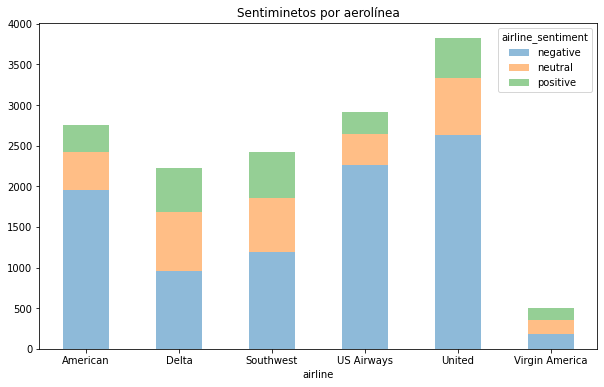

In [8]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [9]:
#!pip install nltk

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [12]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#print(X_train)

In [14]:
y_train.unique()

array([ 0, -1,  1])

In [15]:
y_train.value_counts()

-1    6093
 0    2115
 1    1600
Name: airline_sentiment, dtype: int64

In [16]:
y_test.value_counts()

-1    3085
 0     984
 1     763
Name: airline_sentiment, dtype: int64

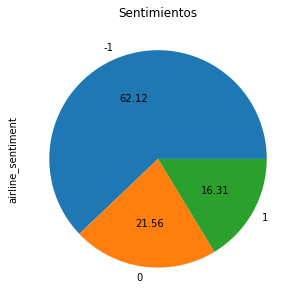

In [17]:
plot = y_train.value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5),title='Sentimientos')


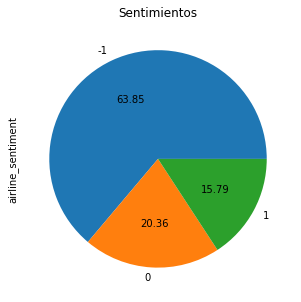

In [18]:
plot = y_test.value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5),title='Sentimientos')

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer con todo en vocabulario en minúsculas.
vect_1 = CountVectorizer() 
X_train_1 = vect_1.fit_transform(X_train) # Preprocesamiento en train
X_test_1 = vect_1.transform(X_test) # Preprocesamiento en test


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True,class_weight = "balanced") 

param_grid = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_1, y_train)
print(CV_rfc.best_params_)

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 400}


In [21]:
y_pred_1=CV_rfc.best_estimator_.predict(X_test_1)
y_pred_1p=CV_rfc.best_estimator_.predict_proba(X_test_1)

In [22]:
unique, counts = np.unique(y_pred_1,return_counts=True)
print(np.asarray((unique,counts)).T)

[[  -1 2743]
 [   0 1227]
 [   1  862]]


In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
acc_rf = accuracy_score(y_test, y_pred_1) # Accuracy en test
print('Accuracy evaluado respecto a la muestra de test: ', acc_rf)

Accuracy evaluado respecto a la muestra de test:  0.7520695364238411


In [24]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred_1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.79      0.84      3085
     class 1       0.54      0.67      0.60       984
     class 2       0.62      0.70      0.66       763

    accuracy                           0.75      4832
   macro avg       0.68      0.72      0.70      4832
weighted avg       0.78      0.75      0.76      4832



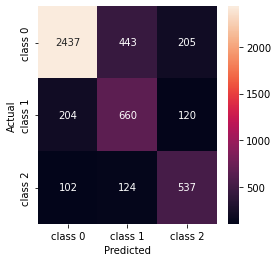

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred_1)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [26]:
roc_auc_score(y_test, y_pred_1p, multi_class='ovr')

0.8780224934746426

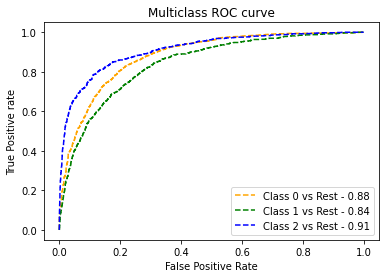

In [27]:
# roc curve for classes

fpr = {}
tpr = {}
thresh = {}
auc_roc = {}

clases = [-1,0,1]


for i, value in enumerate(clases):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_1p[:,i], pos_label=value)
    auc_roc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest - '+str(round(auc_roc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest - '+str(round(auc_roc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest - '+str(round(auc_roc[2],2)))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 2
# Eliminación de stopwords al usar el parámetro 'stop_words' de la función CountVectorizer()
vect_no_stopw = CountVectorizer(stop_words='english')
print(vect_no_stopw.get_stop_words())

frozenset({'myself', 'moreover', 'they', 'un', 'these', 'against', 'through', 'across', 'found', 'already', 'very', 'i', 'about', 'otherwise', 'once', 'put', 'front', 'see', 'seem', 'serious', 'five', 'thereby', 'how', 'none', 'throughout', 'take', 'con', 'everywhere', 'hundred', 'however', 'himself', 'per', 'fifteen', 'neither', 'someone', 'twenty', 'was', 'another', 'we', 'nowhere', 'never', 'cannot', 'back', 'rather', 'full', 'my', 'by', 'latterly', 'enough', 'somehow', 'part', 'he', 'above', 'the', 'are', 'call', 'below', 'next', 'perhaps', 'down', 'show', 'whither', 'further', 'whenever', 'yourself', 'ten', 'thereafter', 'get', 'find', 'can', 'toward', 'around', 'side', 'thus', 'less', 'de', 'co', 'being', 'there', 'everyone', 'though', 'behind', 'beside', 'hereby', 'with', 'whereby', 'three', 'besides', 'go', 'whoever', 'ever', 'too', 'out', 'every', 'here', 'beforehand', 'hasnt', 'which', 'should', 'became', 'that', 'will', 'onto', 'system', 'mostly', 'of', 'namely', 'as', 'now'

In [29]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer sin stopwords
X_train_2 = vect_no_stopw.fit_transform(X_train) # Preprocesamiento en train
X_test_2 = vect_no_stopw.transform(X_test) # Preprocesamiento en test

In [30]:
X_train_2.shape

(9808, 11777)

In [31]:
X_train_1.shape

(9808, 12056)

In [32]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True,class_weight = "balanced") 

param_grid = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
CV_rfc_ns = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc_ns.fit(X_train_2, y_train)
print(CV_rfc_ns.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 400}


In [33]:
y_pred_2=CV_rfc_ns.best_estimator_.predict(X_test_2)
y_pred_2p=CV_rfc_ns.best_estimator_.predict_proba(X_test_2)

In [34]:
acc_rf = accuracy_score(y_test, y_pred_2) # Accuracy en test
print('Accuracy evaluado respecto a la muestra de test: ', acc_rf)

Accuracy evaluado respecto a la muestra de test:  0.7386175496688742


In [35]:
unique, counts = np.unique(y_pred_2,return_counts=True)

In [36]:
print(np.asarray((unique,counts)).T)

[[  -1 2671]
 [   0 1336]
 [   1  825]]


In [37]:
y_pred_1

array([ 1, -1, -1, ..., -1,  0,  1])

In [39]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred_2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.77      0.82      3085
     class 1       0.50      0.68      0.57       984
     class 2       0.65      0.70      0.68       763

    accuracy                           0.74      4832
   macro avg       0.68      0.72      0.69      4832
weighted avg       0.77      0.74      0.75      4832



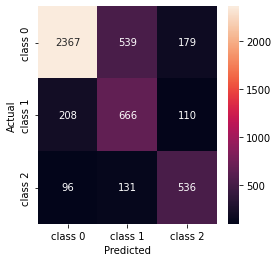

In [40]:
conf_mat = confusion_matrix(y_test, y_pred_2)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
roc_auc_score(y_test, y_pred_2p, multi_class='ovr')

0.8660186868279173

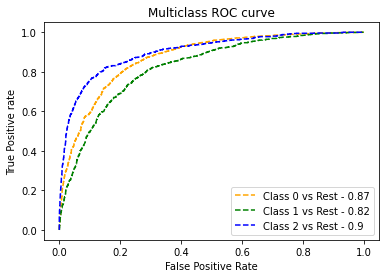

In [42]:
# roc curve for classes

fpr = {}
tpr = {}
thresh = {}
auc_roc = {}

clases = [-1,0,1]


for i, value in enumerate(clases):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_2p[:,i], pos_label=value)
    auc_roc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest - '+str(round(auc_roc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest - '+str(round(auc_roc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest - '+str(round(auc_roc[2],2)))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [43]:
# Celda 3
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [45]:
words = list(vect.vocabulary_.keys())

In [46]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [47]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un verbo
#print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in words])

In [48]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [49]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)

In [50]:
# Creación de matrices de documentos usando CountVectorizer sin stopwords
X_train_3 = vect_lemas.fit_transform(X_train) # Preprocesamiento en train
X_test_3 = vect_lemas.transform(X_test) # Preprocesamiento en test

In [51]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True,class_weight = "balanced") 

param_grid = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
CV_rfc_l = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc_l.fit(X_train_3, y_train)
print(CV_rfc_l.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}


In [52]:
y_pred_3=CV_rfc_l.best_estimator_.predict(X_test_3)
y_pred_3p=CV_rfc_l.best_estimator_.predict_proba(X_test_3)

In [53]:
acc_rf = accuracy_score(y_test, y_pred_3) # Accuracy en test
print('Accuracy evaluado respecto a la muestra de test: ', acc_rf)

Accuracy evaluado respecto a la muestra de test:  0.7419288079470199


In [54]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred_3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.79      0.83      3085
     class 1       0.51      0.65      0.57       984
     class 2       0.63      0.66      0.65       763

    accuracy                           0.74      4832
   macro avg       0.67      0.70      0.68      4832
weighted avg       0.76      0.74      0.75      4832



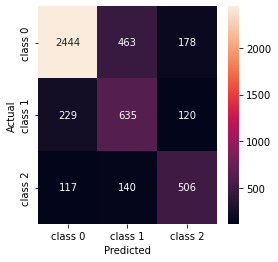

In [55]:
conf_mat = confusion_matrix(y_test, y_pred_3)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
roc_auc_score(y_test, y_pred_3p, multi_class='ovr')

0.874139938800799

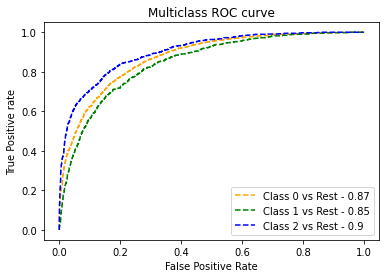

In [57]:
# roc curve for classes

fpr = {}
tpr = {}
thresh = {}
auc_roc = {}

clases = [-1,0,1]


for i, value in enumerate(clases):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_3p[:,i], pos_label=value)
    auc_roc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest - '+str(round(auc_roc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest - '+str(round(auc_roc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest - '+str(round(auc_roc[2],2)))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [58]:
# Celda 4
#vect_no_stopw = CountVectorizer(stop_words='english')
#vect_no_stopw.fit(X_train)
words = list(vect_no_stopw.vocabulary_.keys())
vect_lemas = CountVectorizer(analyzer=split_into_lemmas,stop_words='english')
vect_lemas.fit(X_train)

CountVectorizer(analyzer=<function split_into_lemmas at 0x7fa8ee93c0e0>,
                stop_words='english')

In [59]:
# Creación de matrices de documentos usando CountVectorizer sin stopwords
X_train_4 = vect_lemas.fit_transform(X_train) # Preprocesamiento en train
X_test_4 = vect_lemas.transform(X_test) # Preprocesamiento en test

In [60]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True,class_weight = "balanced") 

param_grid = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
CV_rfc_mt = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc_mt.fit(X_train_4, y_train)
print(CV_rfc_mt.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 400}


In [61]:
y_pred_4=CV_rfc_mt.best_estimator_.predict(X_test_4)
y_pred_4p=CV_rfc_mt.best_estimator_.predict_proba(X_test_4)

In [62]:
acc_rf = accuracy_score(y_test, y_pred_4) # Accuracy en test
print('Accuracy evaluado respecto a la muestra de test: ', acc_rf)

Accuracy evaluado respecto a la muestra de test:  0.7483443708609272


In [63]:
unique, counts = np.unique(y_pred_4,return_counts=True)

In [64]:
print(np.asarray((unique,counts)).T)

[[  -1 2853]
 [   0 1132]
 [   1  847]]


In [65]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred_3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.79      0.83      3085
     class 1       0.51      0.65      0.57       984
     class 2       0.63      0.66      0.65       763

    accuracy                           0.74      4832
   macro avg       0.67      0.70      0.68      4832
weighted avg       0.76      0.74      0.75      4832



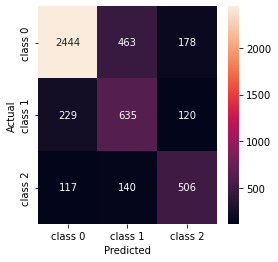

In [66]:
conf_mat = confusion_matrix(y_test, y_pred_3)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred_4p, multi_class='ovr')

0.8632321097920802

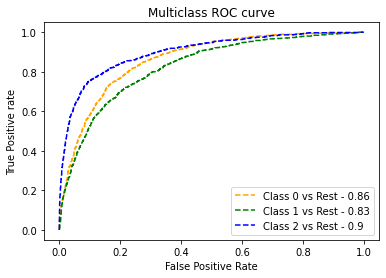

In [68]:
# roc curve for classes

fpr = {}
tpr = {}
thresh = {}
auc_roc = {}

clases = [-1,0,1]


for i, value in enumerate(clases):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_4p[:,i], pos_label=value)
    auc_roc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest - '+str(round(auc_roc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest - '+str(round(auc_roc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest - '+str(round(auc_roc[2],2)))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 5
